##### Forecasting Timeseries Data Using Facebook FbProphet

Steps Required With FbProphet
1. Introduction And Installation
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance MEtrics
9. Conclusions


In [369]:
### pip3 install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
from prophet import Prophet
# from prophet import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [370]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [371]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [372]:
df.drop(168,axis=0,inplace=True)

In [373]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [374]:
df.columns=["ds","y"]               

# This is in facebook col library
# date as ds in fb library and y as output.

<Axes: >

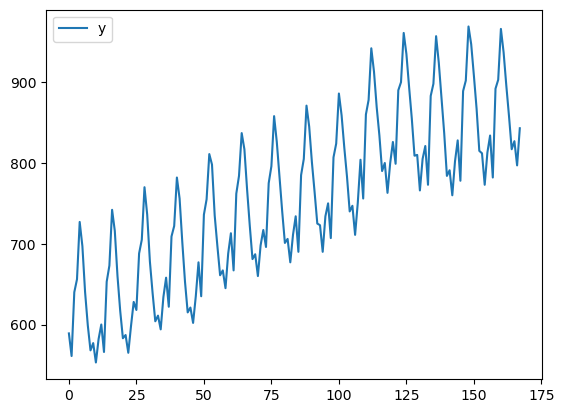

In [375]:
df.plot()

In [376]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [377]:
df['ds']=pd.to_datetime(df['ds'])

# converting data in datetime.

In [378]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

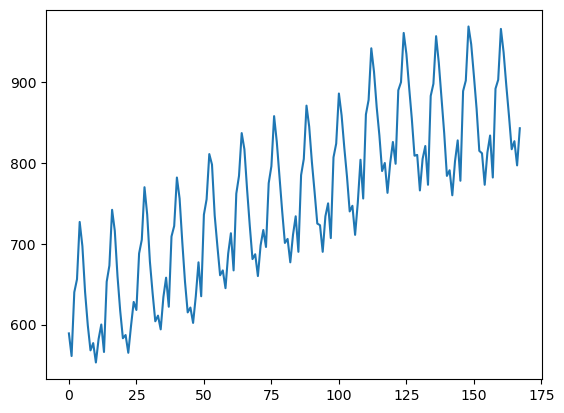

In [379]:
df['y'].plot()


# seasonal data 

In [380]:
# convert seasonal into stationary data.

In [381]:
df['y'].shift(1)

# convert data into stationary so first val is nan.
# in that way also 561-589

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [382]:
df['y']= df['y']-df['y'].shift(1)

In [383]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


<Axes: >

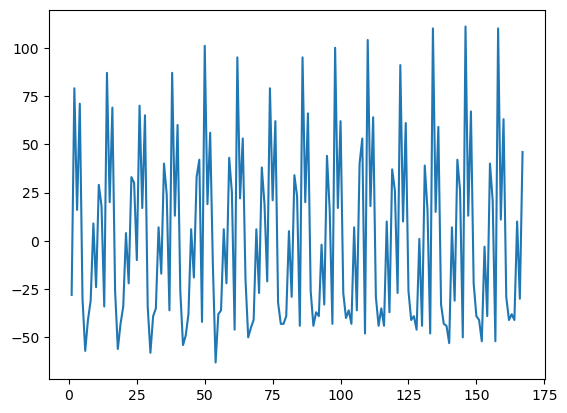

In [384]:
df['y'].plot()

# successfully some percent it converted into stationary data.

# titula test : bcz untill unless p val is not less then .5 we cannot say dataset is stationary .

In [385]:
from prophet import Prophet

In [386]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [387]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


In [388]:
df

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0
...,...,...
163,1975-08-01,-38.0
164,1975-09-01,-41.0
165,1975-10-01,10.0
166,1975-11-01,-30.0


In [389]:
### intiialize the Model
model=Prophet()
model.fit(df)

00:38:54 - cmdstanpy - INFO - Chain [1] start processing
00:38:54 - cmdstanpy - INFO - Chain [1] done processing


In [390]:
model

In [391]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [392]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [393]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [394]:
df.tail()

,ds,y
163,1975-08-01,-38.0
164,1975-09-01,-41.0
165,1975-10-01,10.0
166,1975-11-01,-30.0
167,1975-12-01,46.0


In [395]:
future_dates

,ds
0,1962-02-01
1,1962-03-01
2,1962-04-01
3,1962-05-01
4,1962-06-01
...,...
527,1976-11-26
528,1976-11-27
529,1976-11-28
530,1976-11-29


In [396]:
### Prediction
prediction=model.predict(future_dates)

In [397]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-02-01,1.977110,-47.421634,-28.529838,1.977110,1.977110,-40.260216,-40.260216,-40.260216,-40.260216,-40.260216,-40.260216,0.0,0.0,0.0,-38.283106
1,1962-03-01,1.975257,85.101040,104.362415,1.975257,1.975257,93.021280,93.021280,93.021280,93.021280,93.021280,93.021280,0.0,0.0,0.0,94.996537
2,1962-04-01,1.973207,7.020180,26.309127,1.973207,1.973207,14.326011,14.326011,14.326011,14.326011,14.326011,14.326011,0.0,0.0,0.0,16.299217
3,1962-05-01,1.971222,53.182661,72.133925,1.971222,1.971222,60.545888,60.545888,60.545888,60.545888,60.545888,60.545888,0.0,0.0,0.0,62.517110
4,1962-06-01,1.969171,-35.865712,-16.381126,1.969171,1.969171,-28.215809,-28.215809,-28.215809,-28.215809,-28.215809,-28.215809,0.0,0.0,0.0,-26.246638


In [398]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
527,1976-11-26,12.966114,3.617195,22.443228
528,1976-11-27,18.420174,9.194839,28.325515
529,1976-11-28,24.008445,14.797661,34.325030
530,1976-11-29,29.618238,20.290180,38.702794
531,1976-11-30,35.130953,25.455772,44.378452


In [399]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-02-01,-38.283106,-47.421634,-28.529838
1,1962-03-01,94.996537,85.101040,104.362415
2,1962-04-01,16.299217,7.020180,26.309127
3,1962-05-01,62.517110,53.182661,72.133925
4,1962-06-01,-26.246638,-35.865712,-16.381126


#### Plotting the Forecasts
 
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

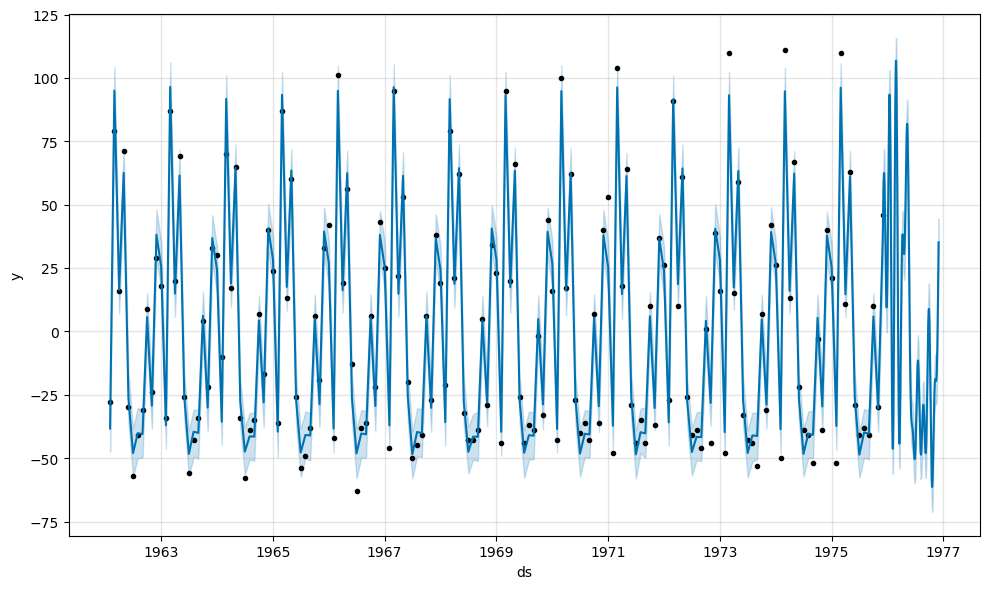

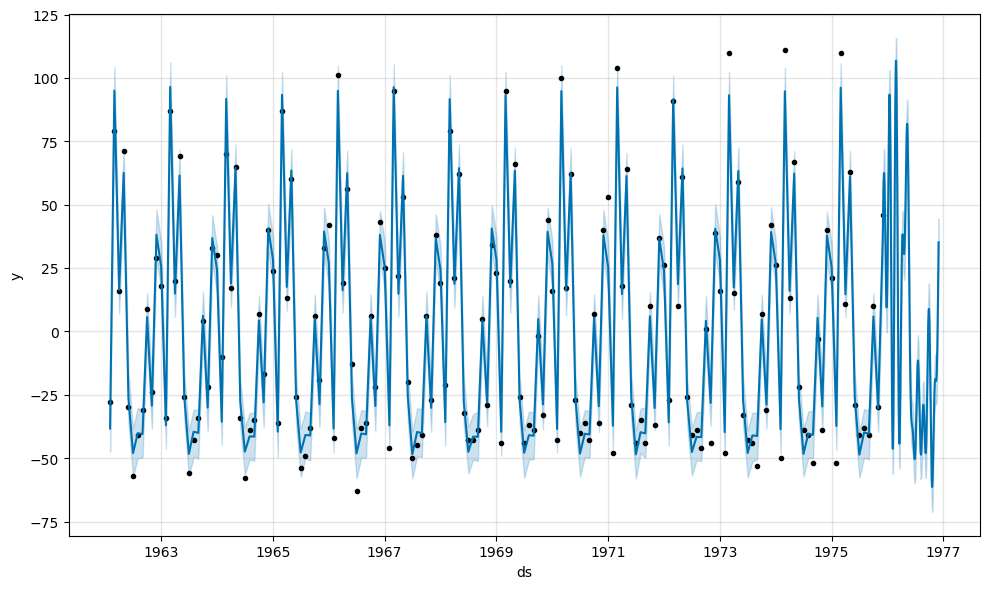

In [400]:
#### plot the predicted projection
model.plot(prediction)

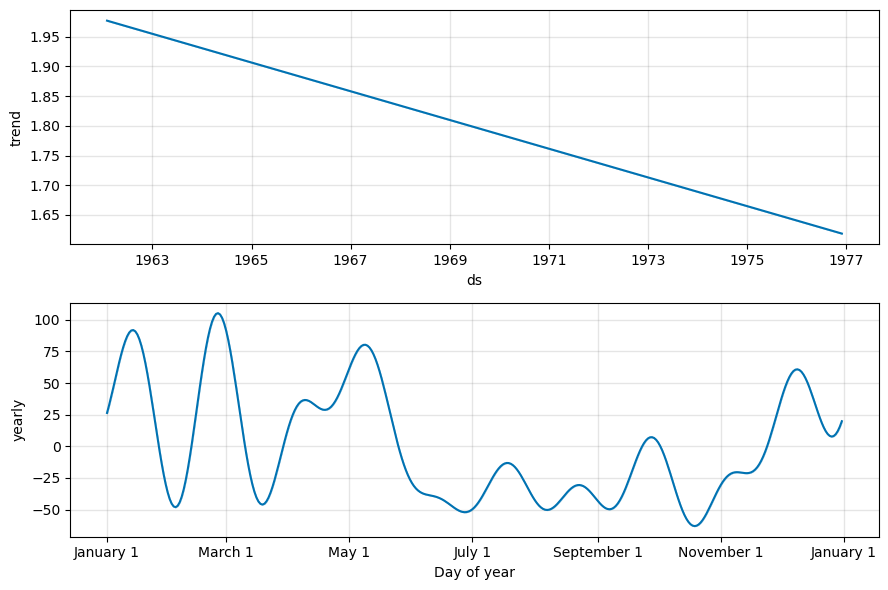

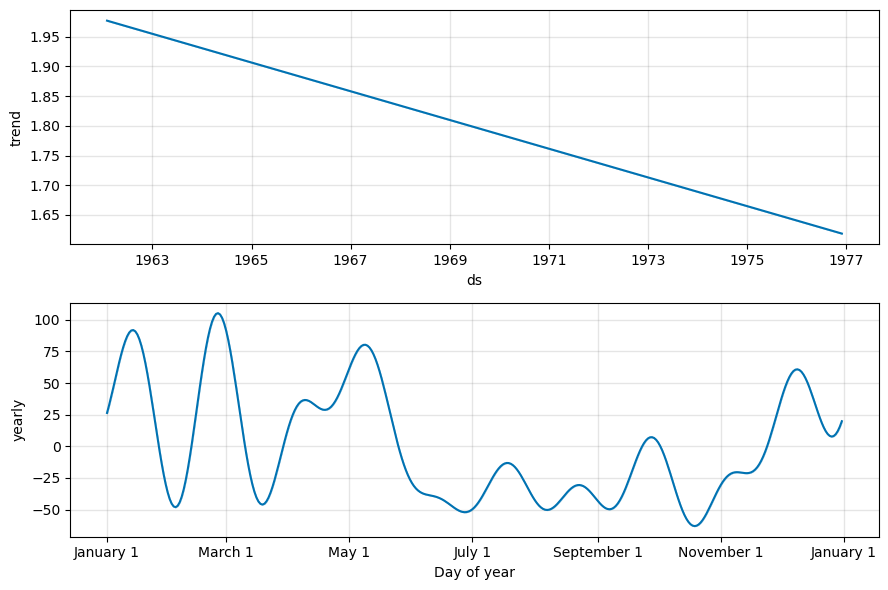

In [401]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

#### Cross Validation
 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [402]:
from prophet.diagnostics import cross_validation

In [403]:
# IN TIME SERIES WE DIVIDED DATA INTO DIFF FORM NO SAME AS SQ LEARN

df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

  0%|          | 0/20 [00:00<?, ?it/s]

00:38:55 - cmdstanpy - INFO - Chain [1] start processing
00:38:55 - cmdstanpy - INFO - Chain [1] done processing
00:38:55 - cmdstanpy - INFO - Chain [1] start processing
00:38:55 - cmdstanpy - INFO - Chain [1] done processing
00:38:55 - cmdstanpy - INFO - Chain [1] start processing
00:38:55 - cmdstanpy - INFO - Chain [1] done processing
00:38:55 - cmdstanpy - INFO - Chain [1] start processing
00:38:55 - cmdstanpy - INFO - Chain [1] done processing
00:38:55 - cmdstanpy - INFO - Chain [1] start processing
00:38:55 - cmdstanpy - INFO - Chain [1] done processing
00:38:55 - cmdstanpy - INFO - Chain [1] start processing
00:38:55 - cmdstanpy - INFO - Chain [1] done processing
00:38:55 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898333,-46.488158,-35.498120,-49.0,1965-07-21
1,1965-09-01,-34.869403,-40.110008,-29.353111,-38.0,1965-07-21
2,1965-10-01,6.103185,0.667425,11.624772,6.0,1965-07-21
3,1965-11-01,-20.281447,-25.964497,-14.672594,-19.0,1965-07-21
4,1965-12-01,36.035424,30.156380,41.552703,33.0,1965-07-21


#### Obtaining the Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,122.837057,11.083188,9.105000,0.261910,0.196001,0.252482,0.458333
1,42 days,114.743775,10.711852,8.560398,0.232258,0.172001,0.231400,0.541667
2,43 days,122.915594,11.086731,8.801397,0.225797,0.172001,0.228022,0.541667
3,46 days,89.001358,9.434053,7.858958,0.213075,0.172001,0.205363,0.583333
4,47 days,86.976632,9.326126,7.673293,0.209921,0.172001,0.202329,0.604167


In [ ]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')